In [1]:
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline


In [2]:
baseA_predict = pd.read_excel('附件1 监测点A空气质量预报基础数据.xlsx', sheet_name='监测点A逐小时污染物浓度与气象一次预报数据')
baseA_real_hour = pd.read_excel('附件1 监测点A空气质量预报基础数据.xlsx', sheet_name='监测点A逐小时污染物浓度与气象实测数据')
baseA1_predict = pd.read_excel('附件3 监测点A1、A2、A3空气质量预报基础数据.xlsx', sheet_name='监测点A1逐小时污染物浓度与气象一次预报数据')
baseA1_real_hour = pd.read_excel('附件3 监测点A1、A2、A3空气质量预报基础数据.xlsx', sheet_name='监测点A1逐小时污染物浓度与气象实测数据')
baseA2_predict = pd.read_excel('附件3 监测点A1、A2、A3空气质量预报基础数据.xlsx', sheet_name='监测点A2逐小时污染物浓度与气象一次预报数据')
baseA2_real_hour = pd.read_excel('附件3 监测点A1、A2、A3空气质量预报基础数据.xlsx', sheet_name='监测点A2逐小时污染物浓度与气象实测数据')
baseA3_predict = pd.read_excel('附件3 监测点A1、A2、A3空气质量预报基础数据.xlsx', sheet_name='监测点A3逐小时污染物浓度与气象一次预报数据')
baseA3_real_hour = pd.read_excel('附件3 监测点A1、A2、A3空气质量预报基础数据.xlsx', sheet_name='监测点A3逐小时污染物浓度与气象实测数据')

In [3]:
baseA_real_hour.columns

Index(['监测时间', '地点', 'SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
       'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)', '温度(℃)', '湿度(%)',
       '气压(MBar)', '风速(m/s)', '风向(°)'],
      dtype='object')

In [4]:
# 转换数据格式并进行数据清洗
def change_type(dfs, df_name):
    res = []
    if df_name == 'predict':
        # 处理逐小时污染物浓度与气象一次预报数据
        for df in dfs:
            df.columns = ['模型运行日期', '预测时间', '地点', '近地2米温度（℃）', '地表温度（K）', '比湿（kg/kg）', '湿度（%）',
               '近地10米风速（m/s）', '近地10米风向（°）', '雨量（mm）', '云量', '边界层高度（m）', '大气压（Kpa）',
               '感热通量（W/m²）', '潜热通量（W/m²）', '长波辐射（W/m²）', '短波辐射（W/m²）', '地面太阳能辐射（W/m²）',
               'SO2小时平均浓度(μg/m³)', 'NO2小时平均浓度(μg/m³)', 'PM10小时平均浓度(μg/m³)',
               'PM2.5小时平均浓度(μg/m³)', 'O3小时平均浓度(μg/m³)', 'CO小时平均浓度(mg/m³)']

            for column_numeric in ['近地2米温度（℃）', '地表温度（K）', '比湿（kg/kg）', '湿度（%）',
               '近地10米风速（m/s）', '近地10米风向（°）', '雨量（mm）', '云量', '边界层高度（m）', '大气压（Kpa）',
               '感热通量（W/m²）', '潜热通量（W/m²）', '长波辐射（W/m²）', '短波辐射（W/m²）', '地面太阳能辐射（W/m²）',
               'SO2小时平均浓度(μg/m³)', 'NO2小时平均浓度(μg/m³)', 'PM10小时平均浓度(μg/m³)',
               'PM2.5小时平均浓度(μg/m³)', 'O3小时平均浓度(μg/m³)', 'CO小时平均浓度(mg/m³)']:
                df[column_numeric] = pd.to_numeric(df[column_numeric], errors='coerce')
                # 将负数置为0
                df[column_numeric][ df[column_numeric] < 0] = 0
            df['模型运行日期'] =  pd.to_datetime(df['模型运行日期'])
            df['预测时间'] =  pd.to_datetime(df['预测时间'])
            # 临近值填充
            df = df.fillna(method='pad')
            res.append(df)
    if df_name == 'real_hour':
        # 处理逐小时污染物浓度与气象实测数据
        for df in dfs:
            df.columns = ['监测时间', '地点', 'SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
               'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)', '温度(℃)', '湿度(%)',
               '气压(MBar)', '风速(m/s)', '风向(°)']

            for column_numeric in ['SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
               'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)', '温度(℃)', '湿度(%)',
               '气压(MBar)', '风速(m/s)', '风向(°)']:
                df[column_numeric] = pd.to_numeric(df[column_numeric], errors='coerce')
                # 将负数置为0
                df[column_numeric][ df[column_numeric] < 0] = 0
            df['监测时间'] =  pd.to_datetime(df['监测时间'])
            # 临近值填充
            df = df.fillna(method='pad')
            res.append(df)
    if df_name == 'real_day':
        # 处理逐日污染物浓度实测数据
        for df in dfs:
            df.columns = ['监测日期', '地点', 'SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
               'PM2.5监测浓度(μg/m³)', 'O3最大八小时滑动平均监测浓度(μg/m³)', 'CO监测浓度(mg/m³)']
            for column_numeric in ['SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
               'PM2.5监测浓度(μg/m³)', 'O3最大八小时滑动平均监测浓度(μg/m³)', 'CO监测浓度(mg/m³)']:
                df[column_numeric] = pd.to_numeric(df[column_numeric], errors='coerce')
                # 将负数置为0
                df[column_numeric][ df[column_numeric] < 0] = 0
            df['监测日期'] =  pd.to_datetime(df['监测日期'])
            # 临近值填充
            df = df.fillna(method='pad')
            res.append(df)
    return res
baseA_predict, baseA1_predict, baseA2_predict, baseA3_predict = change_type((baseA_predict, baseA1_predict, baseA2_predict, baseA3_predict), 'predict')
baseA_real_hour, baseA2_real_hour, baseA3_real_hour = change_type((baseA_real_hour, baseA2_real_hour, baseA3_real_hour), 'real_hour')


In [5]:
baseA1_real_hour.columns

Index(['监测时间', '地点', 'SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
       'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)', '温度(℃)', '湿度(%)',
       '近地风速(m/s)', '风向(°)'],
      dtype='object')

In [6]:
for column_numeric in ['SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
       'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)', '温度(℃)', '湿度(%)',
       '近地风速(m/s)', '风向(°)']:
    
    baseA1_real_hour[column_numeric] = pd.to_numeric(baseA1_real_hour[column_numeric], errors='coerce')
    # 将负数置为0
    baseA1_real_hour[column_numeric][ baseA1_real_hour[column_numeric] < 0] = 0
baseA1_real_hour['监测时间'] =  pd.to_datetime(baseA1_real_hour['监测时间'])
# 临近值填充
baseA1_real_hour = baseA1_real_hour.fillna(method='pad')


In [7]:
# 去除无用数据（仅选择2020-7-20日之后的实测数据和2021-07-13 07:00:00之前的预测数据）
def extract_data(dfs, df_name):
    res = []
    if df_name == 'predict':
        for df in dfs:
            df = df.set_index(['模型运行日期'], drop=False)
            df = df.loc['2020-07-23':'2021-07-10']
            res.append(df)
    if df_name == 'real_hour':
        for df in dfs:
            df = df.set_index(['监测时间'], drop=False)
            df = df.loc['2020-07-20 00:00:00':'2021-07-12 23:00:00']
            res.append(df)
    if df_name == 'real_day':
        for df in dfs:
            df = df.set_index(['监测日期'], drop=False)
            df = df.loc['2020-07-20':'2021-07-12']
            res.append(df)
    return res
baseA_predict, baseA1_predict, baseA2_predict, baseA3_predict = extract_data((baseA_predict, baseA1_predict, baseA2_predict, baseA3_predict),df_name= 'predict')
baseA_real_hour, baseA1_real_hour, baseA2_real_hour, baseA3_real_hour = extract_data((baseA_real_hour, baseA1_real_hour, baseA2_real_hour, baseA3_real_hour), df_name='real_hour')
# baseA_real_day, baseB_real_day, baseC_real_day = extract_data((baseA_real_day, baseB_real_day, baseC_real_day), df_name='real_day')

In [8]:
# 为一次预报数据增加关联索引
from pandas.tseries.offsets import *
def time_index(dfs):
    res = []
    for df in dfs:
        df['实测时间'] = df['预测时间']
        df['实测时间'] = df['实测时间'] - DateOffset(days=3)
        new_columns = ['模型运行日期', '预测时间', '实测时间', '地点', '近地2米温度（℃）', '地表温度（K）', '比湿（kg/kg）', '湿度（%）',
                       '近地10米风速（m/s）', '近地10米风向（°）', '雨量（mm）', '云量', '边界层高度（m）', '大气压（Kpa）',
                       '感热通量（W/m²）', '潜热通量（W/m²）', '长波辐射（W/m²）', '短波辐射（W/m²）', '地面太阳能辐射（W/m²）',
                       'SO2小时平均浓度(μg/m³)', 'NO2小时平均浓度(μg/m³)', 'PM10小时平均浓度(μg/m³)',
                       'PM2.5小时平均浓度(μg/m³)', 'O3小时平均浓度(μg/m³)', 'CO小时平均浓度(mg/m³)']
        df = df.reindex(columns=new_columns)
        res.append(df)
    return res
baseA_predict, baseA1_predict, baseA2_predict, baseA3_predict = time_index((baseA_predict, baseA1_predict, baseA2_predict, baseA3_predict))

In [9]:
baseA1_real_hour.columns

Index(['监测时间', '地点', 'SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
       'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)', '温度(℃)', '湿度(%)',
       '近地风速(m/s)', '风向(°)'],
      dtype='object')

In [10]:
baseA1_real_hour['气压(MBar)'] = np.nan

In [11]:
baseA1_real_hour.columns = ['监测时间', '地点', 'SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
               'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)', '温度(℃)', '湿度(%)',
                '风速(m/s)', '风向(°)','气压(MBar)']
new_columns = ['监测时间', '地点', 'SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
               'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)', '温度(℃)', '湿度(%)',
               '气压(MBar)', '风速(m/s)', '风向(°)']
baseA1_real_hour = baseA1_real_hour.reindex(columns=new_columns)

In [12]:
# 将实测浓度与预测值进行拼接
def concat_astime(source_dfs, concat_dfs):
    res = []
    for source_df, concat_df in zip(source_dfs, concat_dfs):
        concat_df = concat_df.set_index('监测时间', drop=False)
        source_df[['SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
                   'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)', '温度(℃)', '湿度(%)',
                   '气压(MBar)', '风速(m/s)', '风向(°)']] = np.nan
        # 拼接气象数据
        source_df = source_df.set_index('实测时间', drop=False)
        for idx, val in concat_df.iterrows():
            for column_name in ['温度(℃)', '湿度(%)','气压(MBar)', '风速(m/s)', '风向(°)']:
                source_df.at[idx, column_name] = val[column_name]
        # 拼接实测数据
        source_df = source_df.set_index('预测时间', drop=False)
        for idx, val in concat_df.iterrows():
            for column_name in ['SO2监测浓度(μg/m³)', 'NO2监测浓度(μg/m³)', 'PM10监测浓度(μg/m³)',
                   'PM2.5监测浓度(μg/m³)', 'O3监测浓度(μg/m³)', 'CO监测浓度(mg/m³)']:
                source_df.at[idx, column_name] = val[column_name]
        # 去除额外数据
        source_df = source_df.set_index(['模型运行日期'], drop=False)
        source_df = source_df.loc['2020-07-23':'2021-07-10']
        res.append(source_df)
    return res
baseA_predict, baseA1_predict, baseA2_predict, baseA3_predict = concat_astime((baseA_predict, baseA1_predict, baseA2_predict, baseA3_predict), (baseA_real_hour, baseA1_real_hour, baseA2_real_hour, baseA3_real_hour))

In [13]:
def cut_columns(dfs):
    res = []
    for df in dfs:
        df = df[['模型运行日期', '预测时间', '实测时间', '地点', '近地2米温度（℃）', '地表温度（K）', '比湿（kg/kg）',
               '湿度（%）', '近地10米风速（m/s）', '近地10米风向（°）', '雨量（mm）', '云量', '边界层高度（m）',
               '大气压（Kpa）', '感热通量（W/m²）', '潜热通量（W/m²）', '长波辐射（W/m²）', '短波辐射（W/m²）',
               '地面太阳能辐射（W/m²）', 'SO2小时平均浓度(μg/m³)', 'NO2小时平均浓度(μg/m³)',
               'PM10小时平均浓度(μg/m³)', 'PM2.5小时平均浓度(μg/m³)', 'O3小时平均浓度(μg/m³)',
               'CO小时平均浓度(mg/m³)', '温度(℃)', '湿度(%)', '气压(MBar)', '风速(m/s)', '风向(°)']]
        res.append(df)
    return res
baseA1_predict, baseA2_predict, baseA3_predict = cut_columns((baseA1_predict, baseA2_predict, baseA3_predict))
        

In [14]:
def add_columns_location(columns, base_name):
    res = []
    for column in columns:
        res.append(str(column)+str(base_name))
    return res
columns = ['模型运行日期', '预测时间', '实测时间', '地点', '近地2米温度（℃）', '地表温度（K）', '比湿（kg/kg）',
               '湿度（%）', '近地10米风速（m/s）', '近地10米风向（°）', '雨量（mm）', '云量', '边界层高度（m）',
               '大气压（Kpa）', '感热通量（W/m²）', '潜热通量（W/m²）', '长波辐射（W/m²）', '短波辐射（W/m²）',
               '地面太阳能辐射（W/m²）', 'SO2小时平均浓度(μg/m³)', 'NO2小时平均浓度(μg/m³)',
               'PM10小时平均浓度(μg/m³)', 'PM2.5小时平均浓度(μg/m³)', 'O3小时平均浓度(μg/m³)',
               'CO小时平均浓度(mg/m³)', '温度(℃)', '湿度(%)', '气压(MBar)', '风速(m/s)', '风向(°)']
baseA_predict.columns = add_columns_location(baseA_predict.columns, '_A')
baseA1_predict.columns = add_columns_location(baseA1_predict.columns, '_A1')
baseA2_predict.columns = add_columns_location(baseA2_predict.columns, '_A2')
baseA3_predict.columns = add_columns_location(baseA3_predict.columns, '_A3')


In [15]:
baseA_predict.columns

Index(['模型运行日期_A', '预测时间_A', '实测时间_A', '地点_A', '近地2米温度（℃）_A', '地表温度（K）_A',
       '比湿（kg/kg）_A', '湿度（%）_A', '近地10米风速（m/s）_A', '近地10米风向（°）_A', '雨量（mm）_A',
       '云量_A', '边界层高度（m）_A', '大气压（Kpa）_A', '感热通量（W/m²）_A', '潜热通量（W/m²）_A',
       '长波辐射（W/m²）_A', '短波辐射（W/m²）_A', '地面太阳能辐射（W/m²）_A', 'SO2小时平均浓度(μg/m³)_A',
       'NO2小时平均浓度(μg/m³)_A', 'PM10小时平均浓度(μg/m³)_A', 'PM2.5小时平均浓度(μg/m³)_A',
       'O3小时平均浓度(μg/m³)_A', 'CO小时平均浓度(mg/m³)_A', 'SO2监测浓度(μg/m³)_A',
       'NO2监测浓度(μg/m³)_A', 'PM10监测浓度(μg/m³)_A', 'PM2.5监测浓度(μg/m³)_A',
       'O3监测浓度(μg/m³)_A', 'CO监测浓度(mg/m³)_A', '温度(℃)_A', '湿度(%)_A',
       '气压(MBar)_A', '风速(m/s)_A', '风向(°)_A'],
      dtype='object')

In [17]:
baseA_predict = baseA_predict.set_index('预测时间_A', drop=False)
baseA1_predict = baseA1_predict.set_index('预测时间_A1', drop=False)
baseA2_predict = baseA2_predict.set_index('预测时间_A2', drop=False)
baseA3_predict = baseA3_predict.set_index('预测时间_A3', drop=False)


In [50]:
baseA1_predict.columns

Index(['模型运行日期_A1', '预测时间_A1', '实测时间_A1', '地点_A1', '近地2米温度（℃）_A1',
       '地表温度（K）_A1', '比湿（kg/kg）_A1', '湿度（%）_A1', '近地10米风速（m/s）_A1',
       '近地10米风向（°）_A1', '雨量（mm）_A1', '云量_A1', '边界层高度（m）_A1', '大气压（Kpa）_A1',
       '感热通量（W/m²）_A1', '潜热通量（W/m²）_A1', '长波辐射（W/m²）_A1', '短波辐射（W/m²）_A1',
       '地面太阳能辐射（W/m²）_A1', 'SO2小时平均浓度(μg/m³)_A1', 'NO2小时平均浓度(μg/m³)_A1',
       'PM10小时平均浓度(μg/m³)_A1', 'PM2.5小时平均浓度(μg/m³)_A1', 'O3小时平均浓度(μg/m³)_A1',
       'CO小时平均浓度(mg/m³)_A1', '温度(℃)_A1', '湿度(%)_A1', '气压(MBar)_A1',
       '风速(m/s)_A1', '风向(°)_A1'],
      dtype='object')

In [66]:
baseA_predict111 = baseA_predict.fillna(-1)
baseA1_predict111 = baseA1_predict.fillna(-1)

In [67]:
base = pd.merge(baseA_predict111, baseA1_predict111, left_index=True, right_index=True)
base = pd.merge(base, baseA2_predict, left_index=True, right_index=True)
base = pd.merge(base, baseA3_predict, left_index=True, right_index=True)

In [22]:
base_temp = base.drop(['模型运行日期_A1', '预测时间_A1', '实测时间_A1','模型运行日期_A2', '预测时间_A2', '实测时间_A2','模型运行日期_A3', '预测时间_A3', '实测时间_A3'], axis=1)

In [27]:
data_out = base_temp[['SO2监测浓度(μg/m³)_A',
       'NO2监测浓度(μg/m³)_A', 'PM10监测浓度(μg/m³)_A', 'PM2.5监测浓度(μg/m³)_A',
       'O3监测浓度(μg/m³)_A', 'CO监测浓度(mg/m³)_A']]
data_in = base_temp.drop(['SO2监测浓度(μg/m³)_A',
       'NO2监测浓度(μg/m³)_A', 'PM10监测浓度(μg/m³)_A', 'PM2.5监测浓度(μg/m³)_A',
       'O3监测浓度(μg/m³)_A', 'CO监测浓度(mg/m³)_A'], axis=1)
data_all = pd.concat([data_in, data_out], axis=1)

In [28]:
data_all.columns

Index(['模型运行日期_A', '预测时间_A', '实测时间_A', '地点_A', '近地2米温度（℃）_A', '地表温度（K）_A',
       '比湿（kg/kg）_A', '湿度（%）_A', '近地10米风速（m/s）_A', '近地10米风向（°）_A',
       ...
       '湿度(%)_A3', '气压(MBar)_A3', '风速(m/s)_A3', '风向(°)_A3', 'SO2监测浓度(μg/m³)_A',
       'NO2监测浓度(μg/m³)_A', 'PM10监测浓度(μg/m³)_A', 'PM2.5监测浓度(μg/m³)_A',
       'O3监测浓度(μg/m³)_A', 'CO监测浓度(mg/m³)_A'],
      dtype='object', length=117)

In [30]:
data_all = data_all.drop(['气压(MBar)_A1'], axis=1)

<AxesSubplot:>

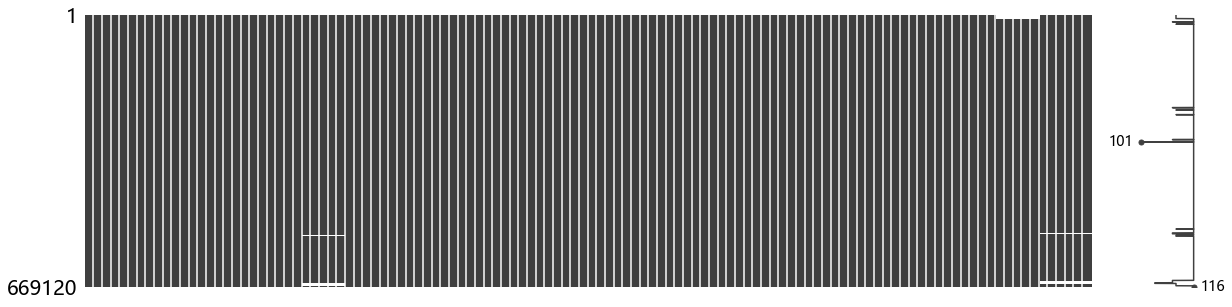

In [31]:
missingno.matrix(data_all, figsize = (20,5))